# Task 2 - Diminos Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv("diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [4]:
df.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [5]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])
df.dtypes

order_id                       int64
order_placed_at       datetime64[ns]
order_delivered_at    datetime64[ns]
dtype: object

In [6]:
df['delivery_time_min'] = (
    df['order_delivered_at'] - df['order_placed_at']
).dt.total_seconds() / 60

In [7]:
df[['delivery_time_min']].head()

,delivery_time_min
0,17.140719
1,15.598754
2,15.104856
3,38.533657
4,16.176984


In [8]:
df['delivery_time_min'].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time_min, dtype: float64

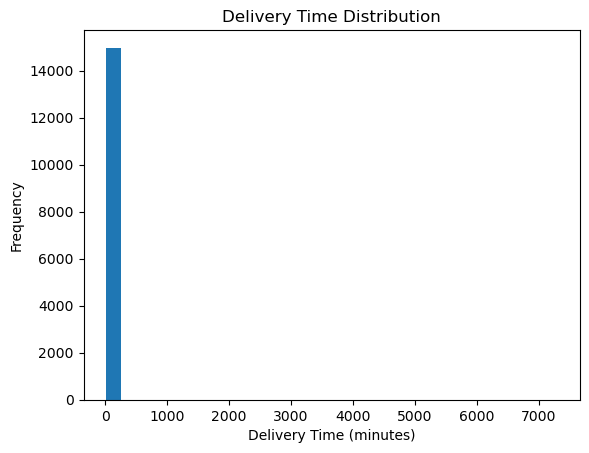

In [9]:
plt.hist(df['delivery_time_min'], bins=30)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.title("Delivery Time Distribution")
plt.show()

In [10]:
p95 = np.percentile(df['delivery_time_min'], 95)
p95

27.261043996666658

In [11]:
if p95 <= 31:
    print("Store meets Diminos SLA")
else:
    print("Store does NOT meet Diminos SLA")

Store meets Diminos SLA


In [12]:
late_percentage = (df['delivery_time_min'] > 31).mean() * 100
late_percentage

3.713333333333333

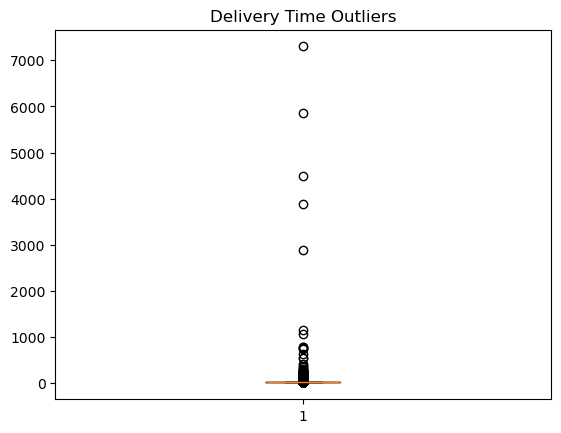

In [13]:
plt.boxplot(df['delivery_time_min'])
plt.title("Delivery Time Outliers")
plt.show()

# Conclusion
The analysis shows that the store’s 95th percentile delivery time is 27.26 minutes, which is below the required SLA threshold of 31 minutes. Approximately 3.7% of orders are delivered late. Although a small number of extreme outliers exist, the overall performance meets Diminos’ service expectations. Continuous monitoring of late deliveries and operational improvements during peak hours are recommended.